In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문과정

#### 교과목명 : 분석라이브러리 활용

- 평가일 : 22.1.21
- 성명 : 김나영
- 점수 : -5 (7번, 13번, 19번)

### Q1. 표준정규분포 기반의 2행 3열 배열을 랜덤하게 생성하여 크기, 자료형, 차원을 출력하세요.

In [9]:
arr = np.random.randn(2,3)
print(f'크기: {np.shape(arr)}')
print(f'자료형: {type(arr)}')    #데이터의 자료형을 보려면 arr.dtype
print(f'차원: {np.ndim(arr)}')

크기: (2, 3)
자료형: <class 'numpy.ndarray'>
차원: 2


### Q2. arange(), reshape() 이용 1차원 2차원 3차원 배열을 아래와 같이 생성하세요.
[0 1 2 3 4 5 6 7 8 9]  

[[0 1 2 3 4]  
 [5 6 7 8 9]]  
 
[[[0 1 2 3 4]  
  [5 6 7 8 9]]]

In [15]:
a = np.arange(0,10)
b = a.reshape(2,-1)
c = a.reshape(1,2,5)

print(a)
print(b)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[[0 1 2 3 4]
  [5 6 7 8 9]]]


### Q3. 1 ~ 100 까지 배열에서 3과 7의 공배수인 것만을 출력하세요.

In [24]:
a = np.arange(1,101)
idx = np.where((a%3==0)&(a%7==0))
print(a[idx])

[21 42 63 84]


### Q4. 아래 3차원 배열을 생성하여 출력한 후 1차원으로 변환하여 출력하세요.(reshape() 사용)

[[[ 0  1  2  3  4]  
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]  
   [15 16 17 18 19]]

 [[20 21 22 23 24]  
   [25 26 27 28 29]]]

In [35]:
a = np.arange(0,30).reshape(3,2,5)
b = a.reshape(-1)

print(a,'\n')
print(b)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]] 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


### Q5. array2d에서 인덱스를 이용해서 값을 선택하고 리스트로 아래와 같이 출력하세요.
arr2d = np.arange(1,10).reshape(3,3)

[3, 6]  

[[1, 2],  
[4, 5]]

[[1, 2, 3]  
[4, 5, 6]]

In [42]:
arr2d = np.arange(1,10).reshape(3,3)
print(arr2d[:2,2],'\n')
print(arr2d[:2,:2],'\n')
print(arr2d[:2,:],'\n')

[3 6] 

[[1 2]
 [4 5]] 

[[1 2 3]
 [4 5 6]] 



### Q6. zeros_like, ones_like, full_like 함수 사용 예를 작성하세요.

In [51]:
arr2d = np.arange(1,7).reshape(2,3)

a = np.zeros_like(arr2d)
b = np.ones_like(arr2d)
c = np.full_like(arr2d, 9)

print(a,'\n')
print(b,'\n')
print(c,'\n')

[[0 0 0]
 [0 0 0]] 

[[1 1 1]
 [1 1 1]] 

[[9 9 9]
 [9 9 9]] 



### Q7. 10 ~ 20 사이의 정수 난수로 10행 5열 2차원 배열을 생성하고 저장한 후 다시 불러내서 출력하세요.

In [256]:
a = np.random.randint(10,21,50).reshape(10,5)

np.save('arr_a',a)
a = np.load('arr_a.npy')

print(a)

[[13 10 17 15 20]
 [14 20 10 15 11]
 [10 13 16 20 18]
 [15 19 12 20 15]
 [10 10 17 16 15]
 [16 16 19 16 16]
 [18 12 12 16 14]
 [19 11 17 16 15]
 [18 11 12 19 15]
 [17 14 10 12 10]]


### Q8. df = sns.load_dataset('titanic')로 불러와서 다음 작업을 수행한 후 출력하세요.
- 전체 칼럼중 'survived'외에 모든 칼럼을 포함한 df_x를 산출한 후 dataset/df_x.pkl로 저장한다.
- df_x.pkl을 데이터프레임 df_x 이름으로 불러온 후 앞 5개 행을 출력한다. 

In [257]:
df = sns.load_dataset('titanic')

df_x = df.drop('survived',axis=1)

df_x.to_pickle('../dataset/df_x.pkl')
df_x = pd.read_pickle('../dataset/df_x.pkl')

df_x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Q9. df = sns.load_dataset('titanic')로 불러와서 deck 열에서 NaN 갯수를 계산하세요.

In [63]:
df = sns.load_dataset('titanic')
print(df.deck.isnull().sum())

688


### Q10. Q9의 df에서 각 칼럼별 null 개수와 df 전체의 null 개수를 구하세요.

In [84]:
print(f"칼럼별 null개수: \n{df.isnull().sum()}\n")
print(f"전체 null개수: {df.isnull().sum().sum()}")

칼럼별 null개수: 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

전체 null개수: 869


### 아래 tdf 데이터프레임에서 Q11 ~ Q12 작업을 수행하세요.

In [85]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df[['survived','sex','age','class']]
tdf.head()

,survived,sex,age,class
0,0,male,22.0,Third
1,1,female,38.0,First
2,1,female,26.0,Third
3,1,female,35.0,First
4,0,male,35.0,Third


### Q11. age를 7개 카테고리로 구분하는 새로운 칼럼 'cat_age'를 생성하여 출력하세요. 단, 카테고리 구분을 수행하는 사용자 함수를 만들고 그 함수를 age 칼럼에 매핑하여 결과를 tdf1에 저장하고 출력하세요.

[카테고리]  
age <= 5: cat = 'Baby'  
age <= 12: cat = 'Child'  
age <= 18: cat = 'Teenager'  
age <= 25: cat = 'Student'  
age <= 60: cat = 'Adult'  
age > 60 : cat = 'Elderly'

In [258]:
def cat_age(age):
    cat=''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

tdf1 = tdf.copy()
tdf1['cat_age'] = tdf.age.apply(lambda x:cat_age(x))
tdf1.head()

,survived,sex,age,class,cat_age
0,0,male,22.0,Third,Student
1,1,female,38.0,First,Adult
2,1,female,26.0,Third,Adult
3,1,female,35.0,First,Adult
4,0,male,35.0,Third,Adult


### Q12.  tdf1의 sex, class 칼럼을 '_'으로 연결한 'sc'칼럼을 추가한 후 아래와 같이 출력하세요.



In [89]:
tdf1.info()
#카테고리는 문자열 결합이 안됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       714 non-null    float64 
 3   class     891 non-null    category
 4   cat_age   891 non-null    object  
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 29.0+ KB


In [94]:
tdf1['sc'] = tdf1.sex + '_' + tdf1['class'].astype(str)
## tdf1['sc'] = tdf1[['sex','class']].agg('_'.join, axis=1)     #이렇게 해도 ok

tdf1.head()

,survived,sex,age,class,cat_age,sc
0,0,male,22.0,Third,Student,male_Third
1,1,female,38.0,First,Adult,female_First
2,1,female,26.0,Third,Adult,female_Third
3,1,female,35.0,First,Adult,female_First
4,0,male,35.0,Third,Adult,male_Third


### Q13. join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합한다. 2개의 주식데이터를 가져와서 join() 메소드로 아래와 같이 결합한 후 다음 사항을 수행하세요.
- df1과 df2의 교집합만 출력되도록 결합하여 df3에 저장하고 출력
- df3에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df4 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)

In [112]:
df1 = pd.read_excel('../dataset/stock price.xlsx', index_col='id')
df2 = pd.read_excel('../dataset/stock valuation.xlsx', index_col='id')

df3 = df1.join(df2, how='inner')     #merge는 특정 '열'을 기준으로 결합(지정 안해주면 전체 열 기준)
df3.drop('name', axis=1, inplace=True)

idx = (df3['eps']<3000) | (df3['stock_name']=='이마트')
df4 = df3[idx]

df4

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780.0,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335.0,40.802348,0.651359


### Q14. 배열 a에 대하여 3차원 자리에 2차원을 2차원 자리에 1차원을 1차원 자리에 3차원을 넣어서 변환하여 출력하세요

-  np.arange 함수를 사용하여 0부터 5까지의 값을 갖는 1차원 배열을 생성합니다. 이후 reshape 함수를 사용하여 이 1차원 배열을 1행 2열 3깊이를 갖는 3차원 배열로 변환
- np.transpose 함수를 사용하여 배열의 차원을 변환합니다. 이 함수는 첫 번째 인자로 배열을, 두 번째 인자로 축 순서를 지정하는 튜플을 받습니다. 여기서는 (1,2,0)이라는 튜플을 전달하여, 원래 배열에서 1번째 축을 0번째 축으로, 2번째 축을 1번째 축으로, 0번째 축을 2번째 축으로 바꿉니다.
- y는 (2,3,1) 크기의 배열이 되며, 이는 원래 배열 a의 축 순서가 (1,2,0)으로 바뀐 결과입니다.

In [260]:
a = np.arange(6).reshape(1,2,3)    #(1,2,3) -> 1차원,2차원,3차원
print(a, a.shape,'\n')

b = a.reshape(2,3,1)    #이렇게도 ok
print(b, '\n')

b = np.transpose(a, (1,2,0))  #(1,2,0) 1차원 자리에 1번(2차원)을, 2차원 자리에 2번(3차원)을, 3차원 자리에 0번(1차원)을
print(b, b.shape)

[[[0 1 2]
  [3 4 5]]] (1, 2, 3) 

[[[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]] 

[[[0]
  [1]
  [2]]

 [[3]
  [4]
  [5]]] (2, 3, 1)


### Q15. 'mpg'를 'kpl' 로 환산하여 새로운 열을 생성하고 반올림하여 소수점 아래 둘째 자리까지 처음 5개행을 출력하세요.

In [118]:
# read_csv() 함수로 df 생성
auto_df = pd.read_csv('../dataset/auto-mpg.csv')

# 열 이름을 지정
auto_df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name'] 
auto_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [119]:
auto_df['kpl'] = (auto_df['mpg']*0.425).round(2)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.22


### Q16. './dataset/stock-data.csv'를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 년, 월, 일로 분리하고 year를 인덱스로 셋팅하여 출력하세요.

In [137]:
df = pd.read_csv('../dataset/stock-data.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Y'] = df['Date'].dt.year
df['M'] = df['Date'].dt.month
df['D'] = df['Date'].dt.day

df = df.set_index('Y')
df.head()
# df.info()

,Date,Close,Start,High,Low,Volume,M,D
Y,,,,,,,,
2018,2018-07-02,10100,10850,10900,10000,137977,7,2
2018,2018-06-29,10700,10550,10900,9990,170253,6,29
2018,2018-06-28,10400,10900,10950,10150,155769,6,28
2018,2018-06-27,10900,10800,11050,10500,133548,6,27
2018,2018-06-26,10800,10900,11000,10700,63039,6,26


### Q17. titanic 데이터셋에서 5개 열을 선택해서 class열을 기준으로 그룹화를 수행한 후 아래와 같이 출력하였다. 다음 사항을 출력하세요.
5개 열 : ['age','sex', 'class', 'fare', 'survived']  
- 그룹별 평균 출력
- 그룹별 최대값 출력

In [146]:
df = sns.load_dataset('titanic')
df1 = df[['age','sex', 'class', 'fare', 'survived']]

x = df1.groupby(['class'])
x.agg(['mean', 'max'])       #sex는 문자형이므로 안 나옴

age             fare            survived    
             mean   max       mean       max      mean max
class                                                     
First   38.233441  80.0  84.154687  512.3292  0.629630   1
Second  29.877630  70.0  20.662183   73.5000  0.472826   1
Third   25.140620  74.0  13.675550   69.5500  0.242363   1

### Q18. titanic 데이터셋에서 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.

In [148]:
group3 = x.get_group('Third')
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


### Q19.  titanic 데이터셋에서 다음 전처리를 수행하세요.
1. df에서 중복 칼럼으로 고려할 수 있는 컬럼들(6개 내외)을 삭제한 후 나머지 컬럼들로 구성되는 데이터프레임을 df1 이름으로 저장 후 출력하세요. 
2. df1에서 null값이 50% 이상인 칼럼을 삭제 후 df2 이름으로 저장하고 출력하세요.
3. df2에서 결측값이 있는 age 칼럼에 대해서 평균값으로 대체 처리를 수행하세요. 
4. df2에서 결측값이 있는 embarked 칼럼에 대해서 앞행의 값으로 대체 처리를 수행하세요. 
5. df2 문자로 되어있는 칼럼들을 레이블 인코딩 수행하여 숫자로 변환 후 df2.info()를 출력하세요

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
# 중복 칼럼 6개 삭제 후, df1로 저장
df1 = df.drop(['class','who','alive','alone','adult_male','embark_town'], axis=1)

# null값이 50%이상인 칼럼 삭제 후, df2에 저장
df2 = df1
for i in df1.columns:
    if df1[i].isnull().sum() >= (len(df)/2):
        df2.drop(i, axis=1, inplace=True)
        
# age 결측값 평균으로 대체
df2.age.replace(np.nan, df2.age.mean(), inplace=True)

# embarked 결측치: 앞의 행 값으로 대체
df2['embarked'].fillna(method='ffill', inplace=True)    #bfill로 하면 뒤의 행 값으로 채움

# 문자로 되어있는 열 레이블인코딩(숫자로 변환) -> df2.info() 확인
df2.embarked.replace({'S':1,'Q':2,'C':3}, inplace=True)
df2.sex.replace({'male':0,'female':1}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Q20. 보스톤 주택가격 데이터를 탐색한 후 가장 중요한 독립변수 2개를 선정하고 그 이유를 시각화하여 설명하세요.

In [200]:
from sklearn.datasets import load_boston
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [230]:
bostonDF.info()
bostonDF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [201]:
bostonDF.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64


<AxesSubplot:ylabel='Frequency'>

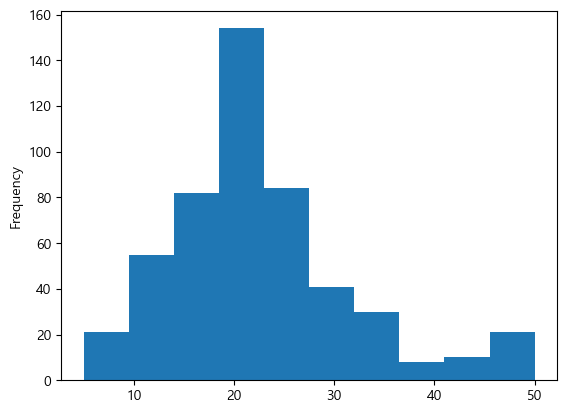

In [234]:
print(bostonDF.PRICE.describe())
bostonDF.PRICE.plot(kind='hist')

corr(): LSTAT/ rm /PTRATIO/ indus/ TAX/ nox 

CRIM: 자치구별 1인당 범죄율
ZN: 2.5만 평방미터를 초과하는 거주지역의 비율
★INDUS: 비소매 상업지역이 점유하고 있는 토지의 비율 (-)
CHAS: 찰스강에 대한 더미변수 (강의 경계에 위치한 경우 1)
★NOX: 10ppm당 농축 일산화질소 (-)
★RM: 주택 1가구당 평균 방 개수 (+)
AGE: 1940 이전 건축된 소유주택 비율
DIS: 보스턴 직업센터까지의 접근성 지수
RAD: 방사형 도로까지의 접근성 지수
★TAX: 만 달러당 재산세율 (-)
★PTRATIO: 자치구별 학생/교사 비율 (-)
B: 자치구별 흑인 비율
★LSTAT: 하위계층 비율 (-)
PRICE: 주택가격

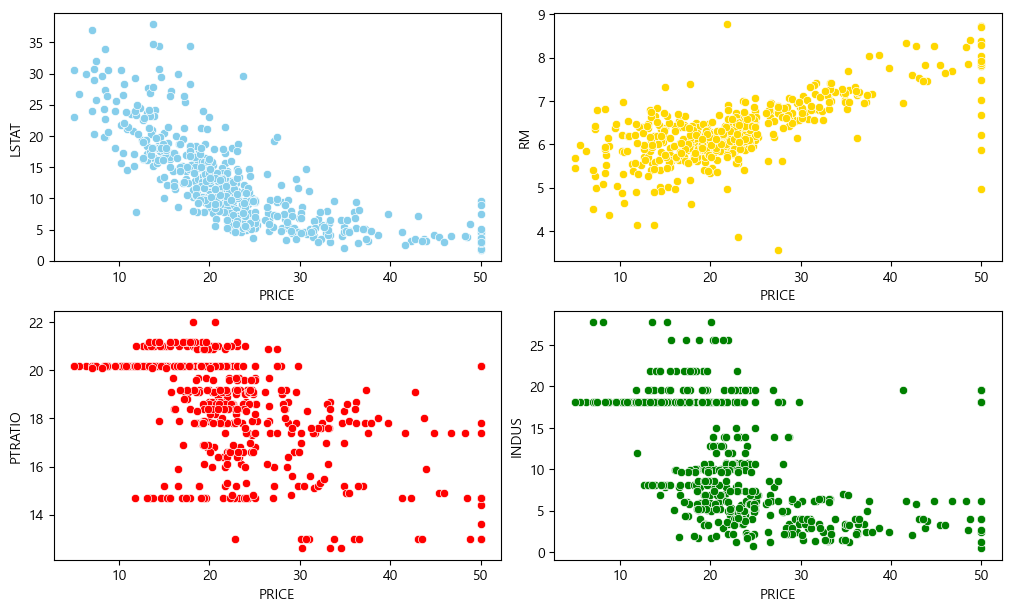

In [228]:
fig, ax = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)

x=bostonDF.PRICE
sns.scatterplot(y='LSTAT', x=x, data=bostonDF, color='skyblue', ax=ax[0,0])
sns.scatterplot(y='RM', x=x, data=bostonDF, color='gold', ax=ax[0,1])
sns.scatterplot(y='PTRATIO', x=x, data=bostonDF, color='red', ax=ax[1,0])
sns.scatterplot(y='INDUS', x=x, data=bostonDF, color='green', ax=ax[1,1])

plt.show()
# 더 확실한 차이를 보여주는 것은 LSTAT와 RM

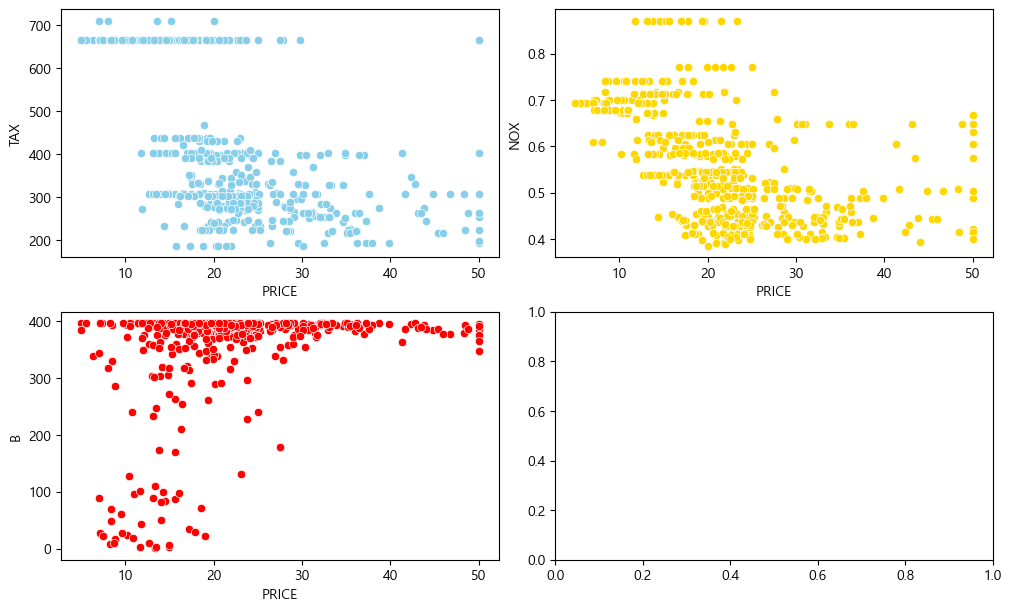

In [254]:
fig, ax = plt.subplots(2,2, figsize=(10,6), constrained_layout=True)

x=bostonDF.PRICE
sns.scatterplot(y='TAX', x=x, data=bostonDF, color='skyblue', ax=ax[0,0])
sns.scatterplot(y='NOX', x=x, data=bostonDF, color='gold', ax=ax[0,1])
sns.scatterplot(y='B', x=x, data=bostonDF, color='red', ax=ax[1,0])

plt.show()